# Inventario ABC XYZ

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel("Data_sets/Superstore.xls")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
data.columns = data.columns.str.replace(' ', '_')
data.rename(columns={"Sub-Category": "Sub_Category"}, inplace=True)

In [4]:
data.Order_Date.min() , data.Order_Date.max()

(Timestamp('2014-01-03 00:00:00'), Timestamp('2017-12-30 00:00:00'))

In [5]:
data.Order_Date.dtype

dtype('<M8[ns]')

In [6]:
data["year"] = data["Order_Date"].dt.year
data["month"] = data["Order_Date"].dt.month

In [7]:
data.head()

,Row_ID,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Customer_Name,Segment,Country,City,...,Product_ID,Category,Sub_Category,Product_Name,Sales,Quantity,Discount,Profit,year,month
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016,11
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016,11
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016,6
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015,10
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015,10


In [8]:
df=data.iloc[:,[1,2,3,4,5,7,13,14,15,17,18,19,21,22]]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
Order_ID        9994 non-null object
Order_Date      9994 non-null datetime64[ns]
Ship_Date       9994 non-null datetime64[ns]
Ship_Mode       9994 non-null object
Customer_ID     9994 non-null object
Segment         9994 non-null object
Product_ID      9994 non-null object
Category        9994 non-null object
Sub_Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
year            9994 non-null int64
month           9994 non-null int64
dtypes: datetime64[ns](2), float64(2), int64(3), object(7)
memory usage: 1.1+ MB


In [9]:
df2 = df.reindex(df.index.repeat(df['Quantity']))
len(df2)

37873

In [10]:
for i in df2.columns:
    if df2[i].dtype=="object":
        print(i,"Número de cualidades:", len(df2[i].unique()))

Order_ID Número de cualidades: 5009
Ship_Mode Número de cualidades: 4
Customer_ID Número de cualidades: 793
Segment Número de cualidades: 3
Product_ID Número de cualidades: 1862
Category Número de cualidades: 3
Sub_Category Número de cualidades: 17


In [11]:
df2.Category.value_counts()

Office Supplies    22906
Furniture           8028
Technology          6939
Name: Category, dtype: int64

In [12]:
df2.Sub_Category.value_counts()

Binders        5974
Paper          5178
Furnishings    3563
Phones         3289
Storage        3158
Art            3000
Accessories    2976
Chairs         2356
Appliances     1729
Labels         1400
Tables         1241
Fasteners       914
Envelopes       906
Bookcases       868
Supplies        647
Machines        440
Copiers         234
Name: Sub_Category, dtype: int64

In [13]:
df_papeleria=df2[df2.Category=="Office Supplies"]
df_papeleria=df_papeleria.drop("Category", axis=1)
df_papeleria.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Product_ID,Sub_Category,Sales,Quantity,Discount,year,month
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,OFF-LA-10000240,Labels,14.620,2,0.0,2016,6
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,OFF-LA-10000240,Labels,14.620,2,0.0,2016,6
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,OFF-ST-10000760,Storage,22.368,2,0.2,2015,10
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,OFF-ST-10000760,Storage,22.368,2,0.2,2015,10
6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,OFF-AR-10002833,Art,7.280,4,0.0,2014,6


In [14]:
df_papeleria=df_papeleria.reset_index()
df_papeleria.head()

,index,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Product_ID,Sub_Category,Sales,Quantity,Discount,year,month
0,2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,OFF-LA-10000240,Labels,14.620,2,0.0,2016,6
1,2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,OFF-LA-10000240,Labels,14.620,2,0.0,2016,6
2,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,OFF-ST-10000760,Storage,22.368,2,0.2,2015,10
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,OFF-ST-10000760,Storage,22.368,2,0.2,2015,10
4,6,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,OFF-AR-10002833,Art,7.280,4,0.0,2014,6


In [15]:
df_papeleria.drop("index", axis=1,inplace=True)
df_papeleria.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Product_ID,Sub_Category,Sales,Quantity,Discount,year,month
0,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,OFF-LA-10000240,Labels,14.620,2,0.0,2016,6
1,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Corporate,OFF-LA-10000240,Labels,14.620,2,0.0,2016,6
2,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,OFF-ST-10000760,Storage,22.368,2,0.2,2015,10
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Consumer,OFF-ST-10000760,Storage,22.368,2,0.2,2015,10
4,CA-2014-115812,2014-06-09,2014-06-14,Standard Class,BH-11710,Consumer,OFF-AR-10002833,Art,7.280,4,0.0,2014,6


In [16]:
df_muebles=df2[df2.Category=="Furniture"].drop("Category", axis=1).reset_index().drop("index", axis=1)
df_tecnologia=df2[df2.Category=="Technology"].drop("Category", axis=1).reset_index().drop("index", axis=1)

df_muebles.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Product_ID,Sub_Category,Sales,Quantity,Discount,year,month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-BO-10001798,Bookcases,261.96,2,0.0,2016,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-BO-10001798,Bookcases,261.96,2,0.0,2016,11
2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-CH-10000454,Chairs,731.94,3,0.0,2016,11
3,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-CH-10000454,Chairs,731.94,3,0.0,2016,11
4,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-CH-10000454,Chairs,731.94,3,0.0,2016,11


In [17]:
from Modulos import Pareto

In [18]:
df_papeleria_agrupado=df_papeleria.groupby(["Sub_Category"]).count()
df_papeleria_agrupado

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Product_ID,Sales,Quantity,Discount,year,month
Sub_Category,,,,,,,,,,,,
Appliances,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729
Art,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
Binders,5974,5974,5974,5974,5974,5974,5974,5974,5974,5974,5974,5974
Envelopes,906,906,906,906,906,906,906,906,906,906,906,906
Fasteners,914,914,914,914,914,914,914,914,914,914,914,914
Labels,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400
Paper,5178,5178,5178,5178,5178,5178,5178,5178,5178,5178,5178,5178
Storage,3158,3158,3158,3158,3158,3158,3158,3158,3158,3158,3158,3158
Supplies,647,647,647,647,647,647,647,647,647,647,647,647


In [19]:
df_papeleria_agrupado.sort_values("Quantity", inplace=True, ascending=False,)
df_papeleria_agrupado.reset_index(inplace=True)
df_papeleria_agrupado

,Sub_Category,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Product_ID,Sales,Quantity,Discount,year,month
0,Binders,5974,5974,5974,5974,5974,5974,5974,5974,5974,5974,5974,5974
1,Paper,5178,5178,5178,5178,5178,5178,5178,5178,5178,5178,5178,5178
2,Storage,3158,3158,3158,3158,3158,3158,3158,3158,3158,3158,3158,3158
3,Art,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000,3000
4,Appliances,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729,1729
5,Labels,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400,1400
6,Fasteners,914,914,914,914,914,914,914,914,914,914,914,914
7,Envelopes,906,906,906,906,906,906,906,906,906,906,906,906
8,Supplies,647,647,647,647,647,647,647,647,647,647,647,647



Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0      Binders      5974   0.260805          26%
1        Paper      5178   0.226054          49%
2      Storage      3158   0.137868          62%
3          Art      3000   0.130970          76%
4   Appliances      1729   0.075482          83%
5       Labels      1400   0.061119          89%
6    Fasteners       914   0.039902          93%
7    Envelopes       906   0.039553          97%
8     Supplies       647   0.028246         100%



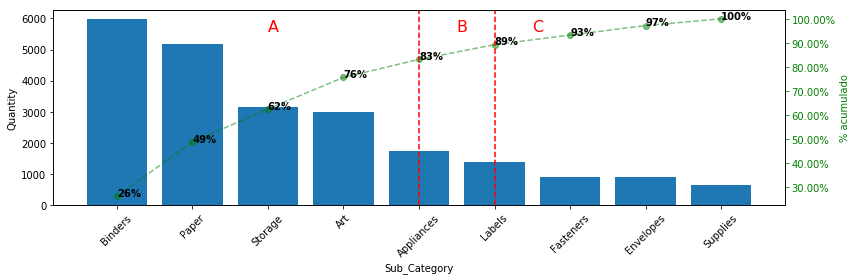

In [20]:
Pareto.pareto_plot(df_papeleria_agrupado,"Sub_Category", "Quantity")

In [21]:
df2.head()

,Order_ID,Order_Date,Ship_Date,Ship_Mode,Customer_ID,Segment,Product_ID,Category,Sub_Category,Sales,Quantity,Discount,year,month
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-BO-10001798,Furniture,Bookcases,261.96,2,0.0,2016,11
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-BO-10001798,Furniture,Bookcases,261.96,2,0.0,2016,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-CH-10000454,Furniture,Chairs,731.94,3,0.0,2016,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-CH-10000454,Furniture,Chairs,731.94,3,0.0,2016,11
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Consumer,FUR-CH-10000454,Furniture,Chairs,731.94,3,0.0,2016,11


In [22]:
print(df2.year.value_counts()) ,print("\n"), print(df2.Category.value_counts())

2017    12476
2016     9837
2015     7979
2014     7581
Name: year, dtype: int64


Office Supplies    22906
Furniture           8028
Technology          6939
Name: Category, dtype: int64


(None, None, None)

_____________________________________________________________________________________________________________________________

 2014 "
-----------------------------------------------------------------------------------------------------------------------------
Office Supplies

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0      Binders      1089   0.238345          24%
1        Paper      1017   0.222587          46%
2      Storage       673   0.147297          61%
3          Art       613   0.134165          74%
4       Labels       326   0.071350          81%
5   Appliances       314   0.068724          88%
6    Envelopes       206   0.045086          93%
7    Fasteners       201   0.043992          97%
8     Supplies       130   0.028453         100%



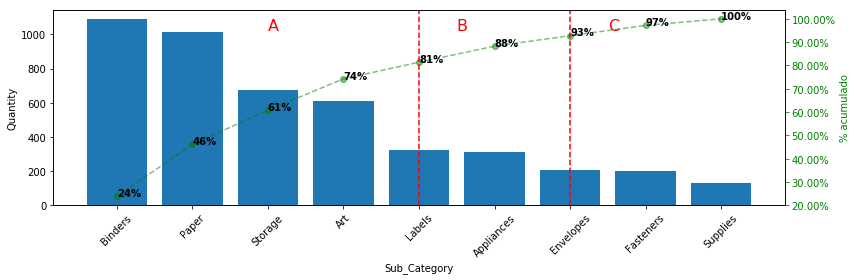

-----------------------------------------------------------------------------------------------------------------------------
Furniture

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0  Furnishings       660   0.406654          41%
1       Chairs       540   0.332717          74%
2       Tables       270   0.166359          91%
3    Bookcases       153   0.094270         100%



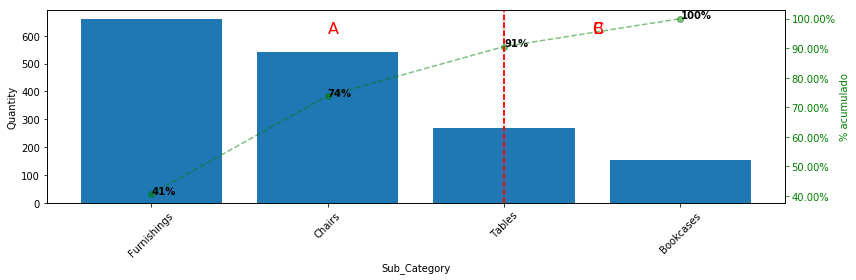

-----------------------------------------------------------------------------------------------------------------------------
Technology

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0       Phones       684   0.492441          49%
1  Accessories       580   0.417567          91%
2     Machines        96   0.069114          98%
3      Copiers        29   0.020878         100%



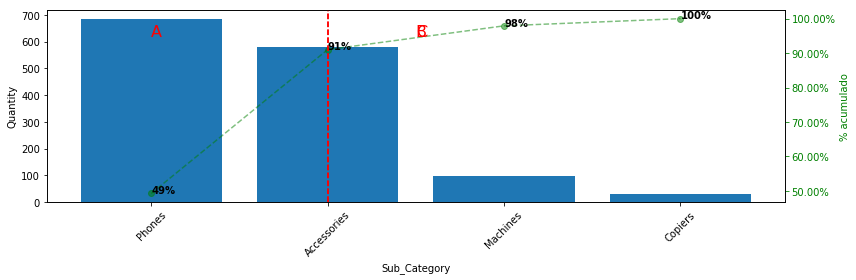

_____________________________________________________________________________________________________________________________

 2015 "
-----------------------------------------------------------------------------------------------------------------------------
Office Supplies

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0      Binders      1215   0.257688          26%
1        Paper      1087   0.230541          49%
2      Storage       655   0.138918          63%
3          Art       608   0.128950          76%
4   Appliances       365   0.077413          83%
5       Labels       263   0.055779          89%
6    Envelopes       237   0.050265          94%
7    Fasteners       176   0.037328          98%
8     Supplies       109   0.023118         100%



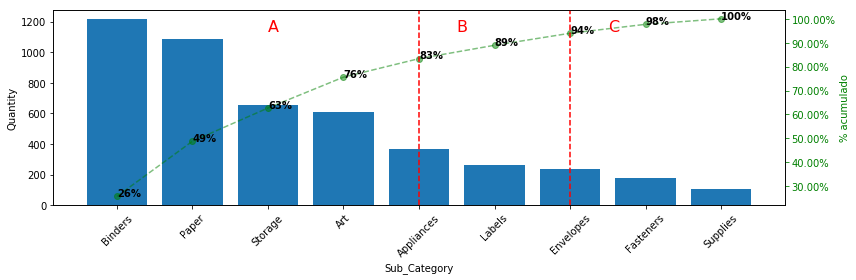

-----------------------------------------------------------------------------------------------------------------------------
Furniture

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0  Furnishings       770   0.433803          43%
1       Chairs       528   0.297465          73%
2    Bookcases       242   0.136338          87%
3       Tables       235   0.132394         100%



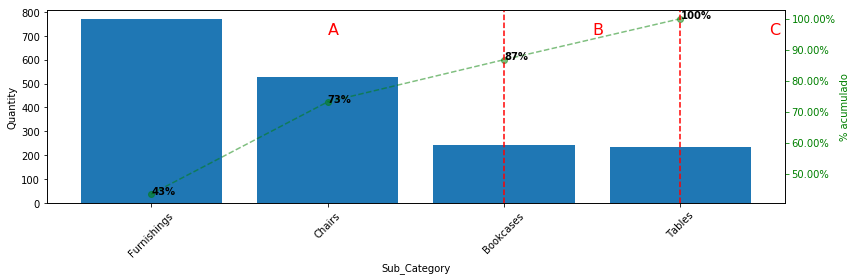

-----------------------------------------------------------------------------------------------------------------------------
Technology

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0       Phones       697   0.468099          47%
1  Accessories       635   0.426461          89%
2     Machines        94   0.063130          96%
3      Copiers        63   0.042310         100%



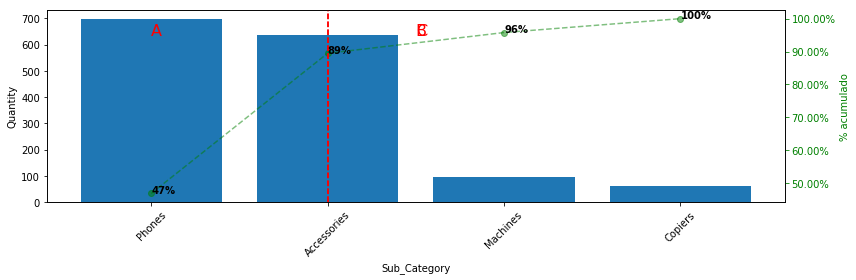

_____________________________________________________________________________________________________________________________

 2016 "
-----------------------------------------------------------------------------------------------------------------------------
Office Supplies

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0      Binders      1603   0.269593          27%
1        Paper      1372   0.230743          50%
2      Storage       808   0.135890          64%
3          Art       678   0.114026          75%
4   Appliances       396   0.066599          82%
5       Labels       363   0.061049          88%
6    Fasteners       288   0.048436          93%
7    Envelopes       222   0.037336          96%
8     Supplies       216   0.036327         100%



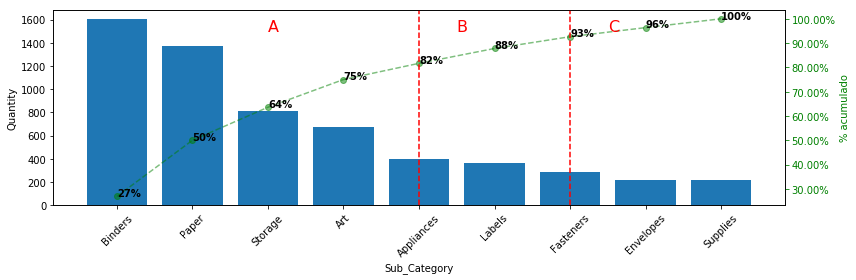

-----------------------------------------------------------------------------------------------------------------------------
Furniture

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0  Furnishings      1036   0.472412          47%
1       Chairs       614   0.279982          75%
2       Tables       346   0.157775          91%
3    Bookcases       197   0.089831         100%



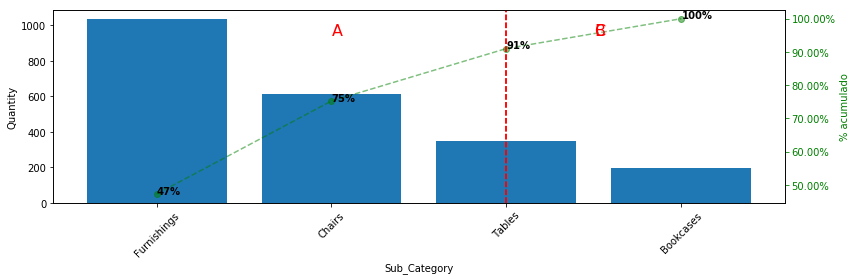

-----------------------------------------------------------------------------------------------------------------------------
Technology

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0       Phones       818   0.481743          48%
1  Accessories       682   0.401649          88%
2     Machines       129   0.075972          96%
3      Copiers        69   0.040636         100%



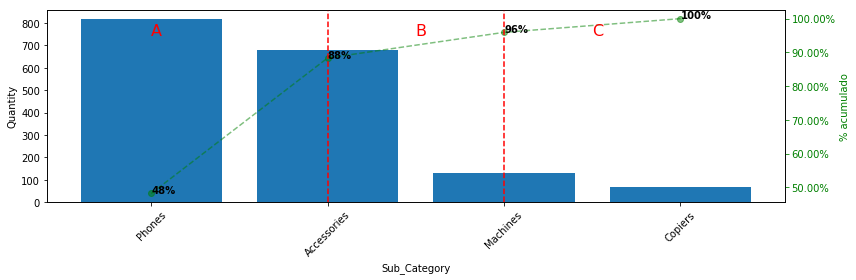

_____________________________________________________________________________________________________________________________

 2017 "
-----------------------------------------------------------------------------------------------------------------------------
Office Supplies

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0      Binders      2067   0.269281          27%
1        Paper      1702   0.221730          49%
2          Art      1101   0.143434          63%
3      Storage      1022   0.133142          77%
4   Appliances       654   0.085201          85%
5       Labels       448   0.058364          91%
6    Fasteners       249   0.032439          94%
7    Envelopes       241   0.031397          97%
8     Supplies       192   0.025013         100%



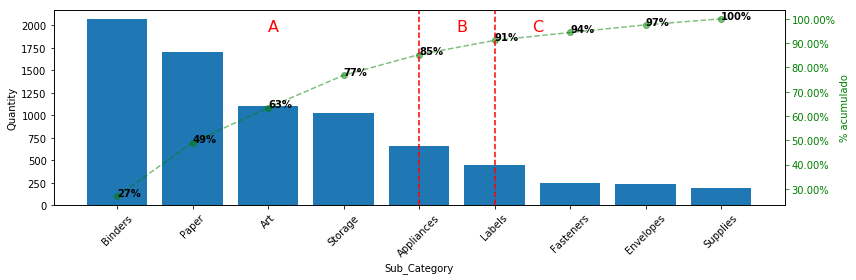

-----------------------------------------------------------------------------------------------------------------------------
Furniture

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0  Furnishings      1097   0.450144          45%
1       Chairs       674   0.276570          73%
2       Tables       390   0.160033          89%
3    Bookcases       276   0.113254         100%



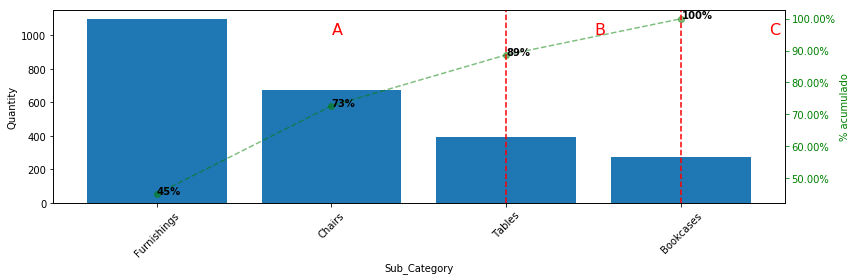

-----------------------------------------------------------------------------------------------------------------------------
Technology

Tabla Pareto

  Sub_Category  Quantity  ponderado  % acumulado
0       Phones      1090   0.461278          46%
1  Accessories      1079   0.456623          92%
2     Machines       121   0.051206          97%
3      Copiers        73   0.030893         100%



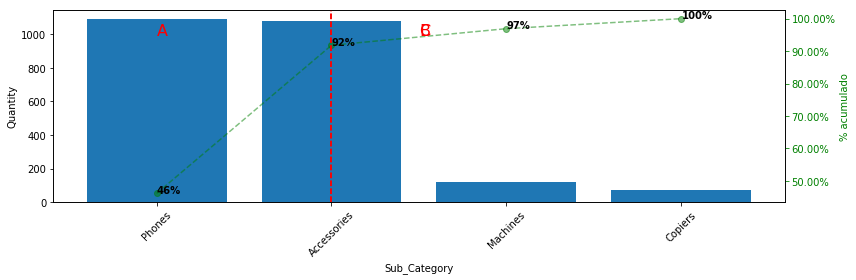

In [23]:
categorias=["Office Supplies", "Furniture", "Technology"]

years=[2014,2015,2016,2017]

for i in years:
    print("_"*125)
    print("\n",i,"\"")
    for j in categorias:
        print("-"*125)
        print(j)
        df_temp=df2[df2.year==i]
        df_temp=df_temp[df_temp.Category==j]            
        df_temp_agrupado=df_temp.groupby(["Sub_Category"]).count()
        df_temp_agrupado.sort_values("Quantity", inplace=True, ascending=False,)
        df_temp_agrupado.reset_index(inplace=True)
        Pareto.pareto_plot(df_temp_agrupado,"Sub_Category", "Quantity")


## XYZ y el Coeficiente de variación

El análisis **XYZ** determina el nivel de variación de un producto con respecto al tiempo. Productos con demanda homogenea presentan muy poca variación, mientras que productos con variación heterogenea presentarán el mayor nivel de variación.

* **X** ---> Muy poca variación

* **Y** ---> Variación media

* **Z** ---> Variación alta

<img src="img/ABCXYZ.jpg">

También conocido como el coeficiencte de variación de Spearman. Este parámetro estadístico nos indica sobre la dispersión relativa de los datos:

\begin{align}
\large
CV=\frac{\sigma}{\mu}
\end{align}

In [24]:
print(df2.head())
print(df2.shape)

         Order_ID Order_Date  Ship_Date     Ship_Mode Customer_ID   Segment  \
0  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520  Consumer   
0  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520  Consumer   
1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520  Consumer   
1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520  Consumer   
1  CA-2016-152156 2016-11-08 2016-11-11  Second Class    CG-12520  Consumer   

        Product_ID   Category Sub_Category   Sales  Quantity  Discount  year  \
0  FUR-BO-10001798  Furniture    Bookcases  261.96         2       0.0  2016   
0  FUR-BO-10001798  Furniture    Bookcases  261.96         2       0.0  2016   
1  FUR-CH-10000454  Furniture       Chairs  731.94         3       0.0  2016   
1  FUR-CH-10000454  Furniture       Chairs  731.94         3       0.0  2016   
1  FUR-CH-10000454  Furniture       Chairs  731.94         3       0.0  2016   

   month  
0     11  
0     11  
1     11  


In [25]:
data_2014=df2[df2.year==2014]
data_2014_papeleria=data_2014[data_2014.Category==categorias[0]]
data_2014_papeleria.shape

(4569, 14)

In [26]:
data_2014_pap_crosstab=pd.crosstab(data_2014_papeleria.Sub_Category, data_2014_papeleria.month)
data_2014_pap_crosstab

month,1,2,3,4,5,6,7,8,9,10,11,12
Sub_Category,,,,,,,,,,,,
Appliances,8,4,13,10,26,30,8,29,70,17,41,58
Art,32,18,72,64,47,81,40,30,72,33,64,60
Binders,42,37,87,79,92,75,104,101,123,68,157,124
Envelopes,13,0,10,13,9,13,12,13,29,28,48,18
Fasteners,7,5,14,28,8,12,10,28,34,16,21,18
Labels,7,10,28,17,17,19,21,12,57,18,68,52
Paper,32,19,92,63,50,53,65,109,138,64,204,128
Storage,28,8,52,65,19,34,59,33,92,80,103,100
Supplies,0,2,2,6,13,5,14,21,9,8,35,15


In [27]:
data_2014_pap_crosstab.std(axis=1)

Sub_Category
Appliances    20.992784
Art           20.344570
Binders       34.377913
Envelopes     12.496060
Fasteners      9.323723
Labels        20.229741
Paper         52.381685
Storage       32.463849
Supplies       9.824213
dtype: float64

In [28]:
data_2014_pap_crosstab["std"]=round(data_2014_pap_crosstab.std(axis=1),2)
data_2014_pap_crosstab["mu"]=round(data_2014_pap_crosstab.mean(axis=1),2)
data_2014_pap_crosstab["CV"]=round(data_2014_pap_crosstab["std"]/data_2014_pap_crosstab["mu"]*100,2)
data_2014_pap_crosstab

month,1,2,3,4,5,6,7,8,9,10,11,12,std,mu,CV
Sub_Category,,,,,,,,,,,,,,,
Appliances,8,4,13,10,26,30,8,29,70,17,41,58,20.99,25.77,81.45
Art,32,18,72,64,47,81,40,30,72,33,64,60,20.34,48.72,41.75
Binders,42,37,87,79,92,75,104,101,123,68,157,124,34.38,86.41,39.79
Envelopes,13,0,10,13,9,13,12,13,29,28,48,18,12.50,16.81,74.36
Fasteners,7,5,14,28,8,12,10,28,34,16,21,18,9.32,16.18,57.60
Labels,7,10,28,17,17,19,21,12,57,18,68,52,20.23,26.63,75.97
Paper,32,19,92,63,50,53,65,109,138,64,204,128,52.38,82.26,63.68
Storage,28,8,52,65,19,34,59,33,92,80,103,100,32.46,54.27,59.81
Supplies,0,2,2,6,13,5,14,21,9,8,35,15,9.82,10.76,91.26


In [29]:
tablas_cruzadas={}

years=[2014,2015,2016,2017]
categorias=["Office Supplies", "Furniture", "Technology"]

for i in years:
    for j in categorias:
        x=df2[df2.year==i]
        x=x[x.Category==j]
        x=pd.crosstab(x.Sub_Category, x.month)
        x["std"]=round(x.std(axis=1),2)
        x["mu"]=round(x.mean(axis=1),2)
        x["%CV"]=round(x["std"]/x["mu"]*100,2)
        llave=str(i)+"_"+j
        tablas_cruzadas[llave]=x

In [30]:
tablas_cruzadas.keys()

dict_keys(['2014_Office Supplies', '2014_Furniture', '2014_Technology', '2015_Office Supplies', '2015_Furniture', '2015_Technology', '2016_Office Supplies', '2016_Furniture', '2016_Technology', '2017_Office Supplies', '2017_Furniture', '2017_Technology'])

In [31]:
tablas_cruzadas["2016_Office Supplies"]

month,1,2,3,4,5,6,7,8,9,10,11,12,std,mu,%CV
Sub_Category,,,,,,,,,,,,,,,
Appliances,4,18,24,17,38,33,36,39,45,23,55,64,16.95,31.77,53.35
Art,20,17,24,67,66,36,61,41,100,51,95,100,30.34,54.49,55.68
Binders,48,35,96,107,122,106,101,140,226,125,250,247,71.47,128.81,55.48
Envelopes,16,10,21,18,23,9,13,13,28,19,25,27,6.47,17.57,36.82
Fasteners,6,22,3,21,8,13,32,21,33,32,62,35,16.34,23.41,69.80
Labels,17,9,4,6,28,58,27,36,70,28,45,35,20.33,29.49,68.94
Paper,43,34,69,79,151,146,110,108,200,102,141,189,53.11,109.62,48.45
Storage,31,36,37,65,68,74,65,23,113,71,115,110,32.24,64.63,49.88
Supplies,0,3,9,28,17,15,28,22,19,14,31,30,10.38,17.41,59.62


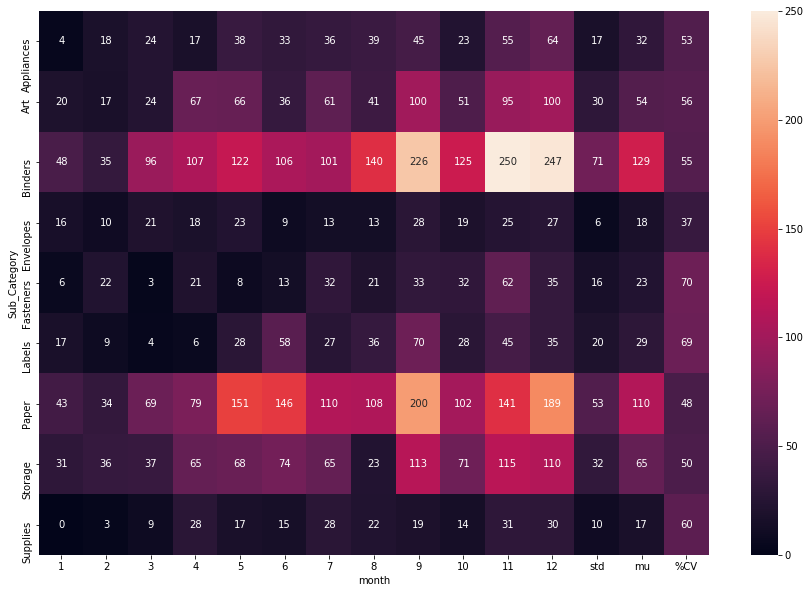

In [32]:
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
ax=sns.heatmap(tablas_cruzadas["2016_Office Supplies"], annot=True, fmt=".0f")

# Medias moviles

Es el promedio de una serie de valores temporales agrupadas en subconjuntos. Cada que un nuevo valor sea introducido en el arreglo de datos, se eliminará el último dato para el cálculo de la siguiente media movil.

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

In [34]:
tablas_cruzadas["2016_Office Supplies"].loc["Envelopes"]

month
1      16.00
2      10.00
3      21.00
4      18.00
5      23.00
6       9.00
7      13.00
8      13.00
9      28.00
10     19.00
11     25.00
12     27.00
std     6.47
mu     17.57
%CV    36.82
Name: Envelopes, dtype: float64

In [35]:
# Utilizamos un dataframe aleatorio con valores para 12 meses
product = {'fecha' : [1,2,3,4,5,6,7,8,9,10,11,12,"SD","MU","%CV"],
           'demanda':tablas_cruzadas["2016_Office Supplies"].loc["Envelopes"]}
df = pd.DataFrame(product).reset_index().drop("month", axis=1)
df = df.drop([12,13,14])
df["fecha"] = df['fecha'].astype(int)
df["fecha"] = df['fecha'].apply(lambda x: calendar.month_abbr[x])
df["fecha"] = df['fecha'].apply(lambda x: pd.Timestamp("2016-"+x+"-01"))
df

,fecha,demanda
0,2016-01-01,16.0
1,2016-02-01,10.0
2,2016-03-01,21.0
3,2016-04-01,18.0
4,2016-05-01,23.0
5,2016-06-01,9.0
6,2016-07-01,13.0
7,2016-08-01,13.0
8,2016-09-01,28.0
9,2016-10-01,19.0


In [36]:
#Crearemos una columna en la que calcularemos la media movil para periodos de 3 meses

for i in range(0,len(df)-2):
    df.loc[df.index[i+2],'SMA_3'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1])/3),1)

In [37]:
df.head()

,fecha,demanda,SMA_3
0,2016-01-01,16.0,NaN
1,2016-02-01,10.0,NaN
2,2016-03-01,21.0,15.7
3,2016-04-01,18.0,16.3
4,2016-05-01,23.0,20.7


In [38]:
df['pandas_SMA_3'] = df.iloc[:,1].rolling(window=3).mean()

In [39]:
df.head()

,fecha,demanda,SMA_3,pandas_SMA_3
0,2016-01-01,16.0,NaN,NaN
1,2016-02-01,10.0,NaN,NaN
2,2016-03-01,21.0,15.7,15.666667
3,2016-04-01,18.0,16.3,16.333333
4,2016-05-01,23.0,20.7,20.666667


In [40]:
for i in range(0,df.shape[0]-3):
    df.loc[df.index[i+3],'SMA_4'] = np.round(((df.iloc[i,1]+ df.iloc[i+1,1] +df.iloc[i+2,1]+df.iloc[i+3,1])/4),1)

In [41]:
df.head()

,fecha,demanda,SMA_3,pandas_SMA_3,SMA_4
0,2016-01-01,16.0,NaN,NaN,NaN
1,2016-02-01,10.0,NaN,NaN,NaN
2,2016-03-01,21.0,15.7,15.666667,NaN
3,2016-04-01,18.0,16.3,16.333333,16.2
4,2016-05-01,23.0,20.7,20.666667,18.0


In [42]:
df['pandas_SMA_4'] = df.iloc[:,1].rolling(window=4).mean()
df.head()

,fecha,demanda,SMA_3,pandas_SMA_3,SMA_4,pandas_SMA_4
0,2016-01-01,16.0,NaN,NaN,NaN,NaN
1,2016-02-01,10.0,NaN,NaN,NaN,NaN
2,2016-03-01,21.0,15.7,15.666667,NaN,NaN
3,2016-04-01,18.0,16.3,16.333333,16.2,16.25
4,2016-05-01,23.0,20.7,20.666667,18.0,18.00


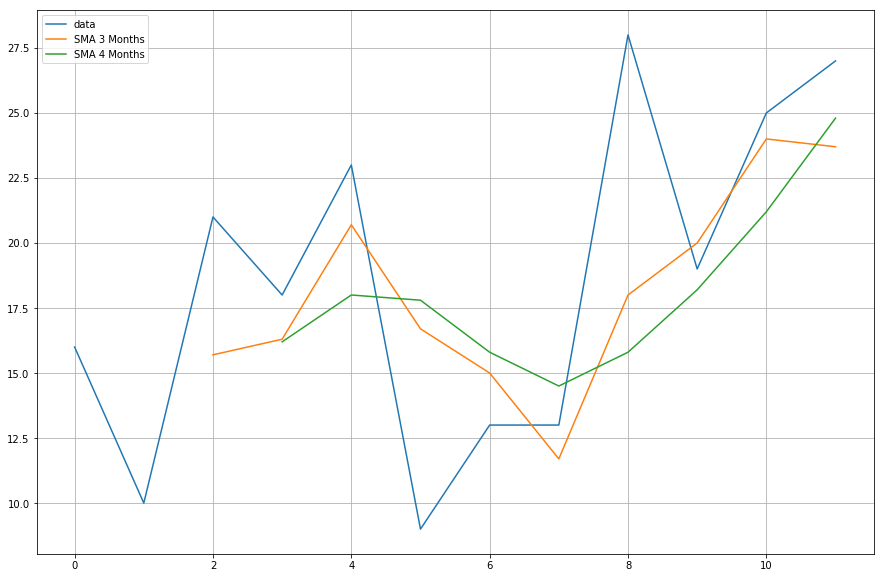

In [43]:
plt.figure(figsize=[15,10])
plt.grid(True)
plt.plot(df['demanda'],label='data')
plt.plot(df['SMA_3'],label='SMA 3 Months')
plt.plot(df['SMA_4'],label='SMA 4 Months')
plt.legend(loc=2)
plt.show()